# End to End Prediction Model based on Linear Regression and DASH APP UI
## The dataset which has been used is -> https://statso.io/real-estate-prediction-case-study/
### Calculating the total price of house based on unit price of house

In [3]:
import pandas as pd
import os

In [5]:
#load the dataset
file_path = os.path.join("data", "Real_Estate.csv")
real_estate_data = pd.read_csv(file_path)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
print(real_estate_data.isnull().sum()) # if the data contains any null values or not

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [21]:
# Descriptive Statistics of the dataset
descriptive_stats = real_estate_data.describe()
print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

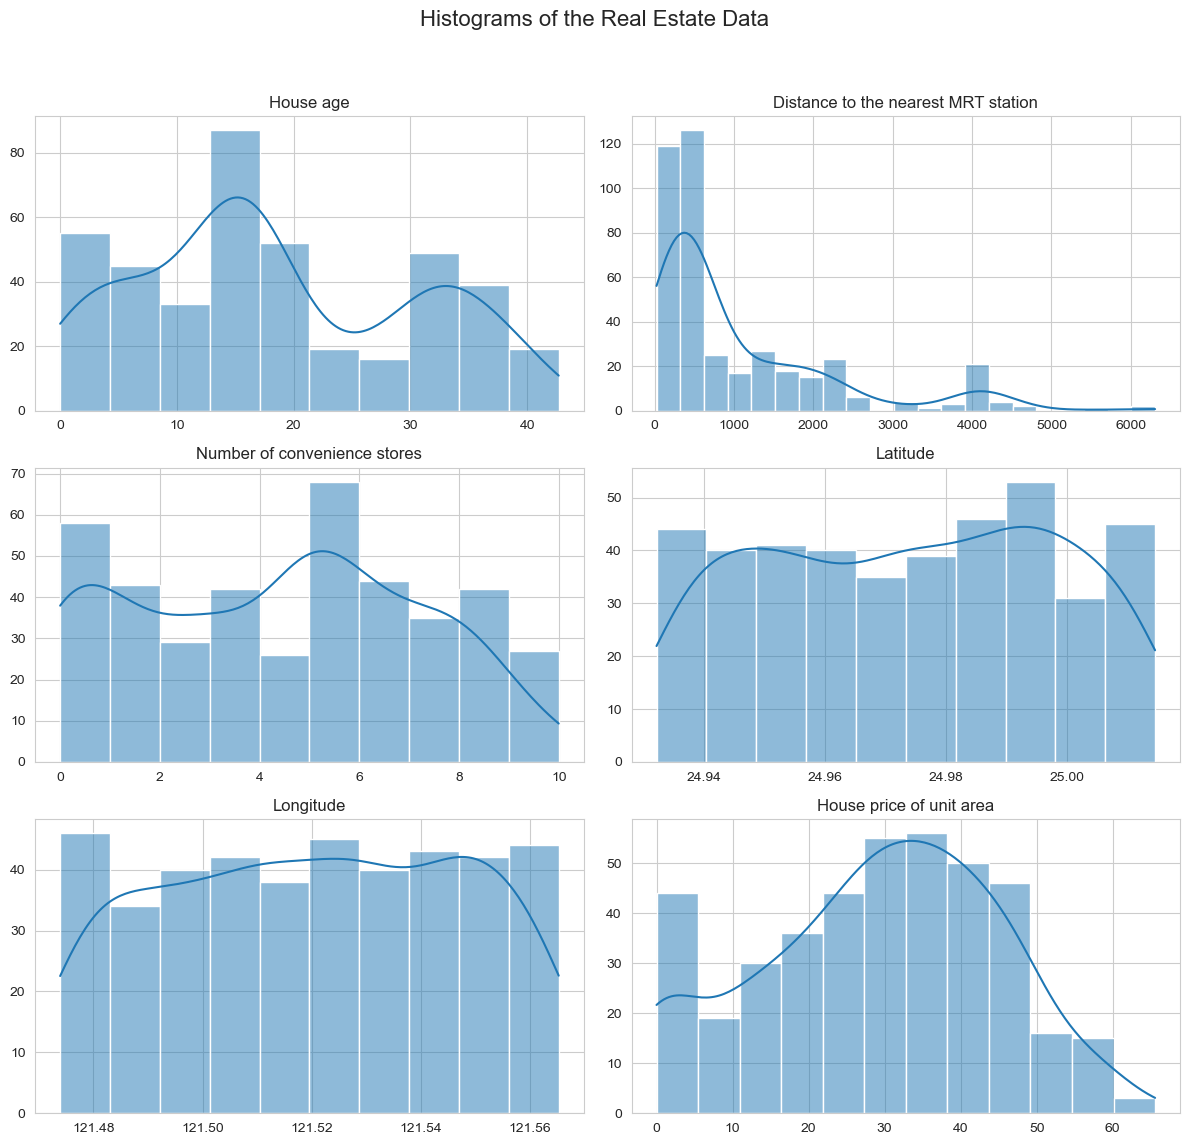

In [27]:
# Histograms of all numerical values
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plot
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of the Real Estate Data', fontsize=16)

cols = ['House age','Distance to the nearest MRT station', 'Number of convenience stores','Latitude', 'Longitude','House price of unit area']
for i, col in enumerate(cols): # loop through each column, create histogram using seaborn with a KDE line over it
    sns.histplot(real_estate_data[col], kde=True, ax = axes[i//2, i%2]) # i//2 -> for the row, i%2-> for the column (this arranges 6 plots
    # in a 3x2 grid )
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('') # hides any x label for cleaner look 
    axes[i//2, i%2].set_ylabel('') # hides any y label for cleaner look

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect parameter ensures that the main title at the top doesn’t get squeezed by subplots.
plt.show()

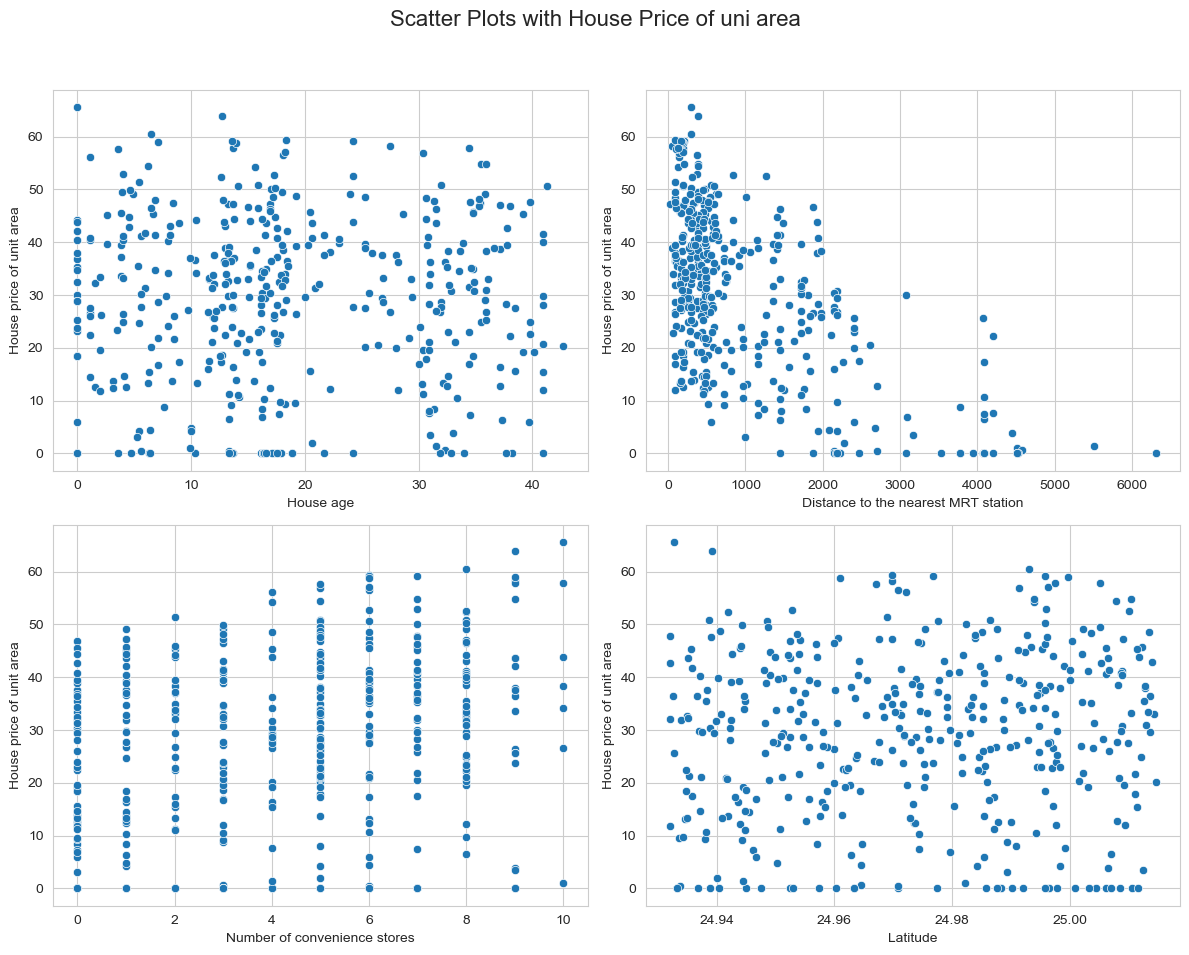

In [41]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of uni area', fontsize=16)

# Scatter plot for each variable against the house price 
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area', ax=axes[0,0])
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0,1])
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area', ax=axes[1,0])
sns.scatterplot(data=real_estate_data, x='Latitude', y='House price of unit area', ax=axes[1,1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

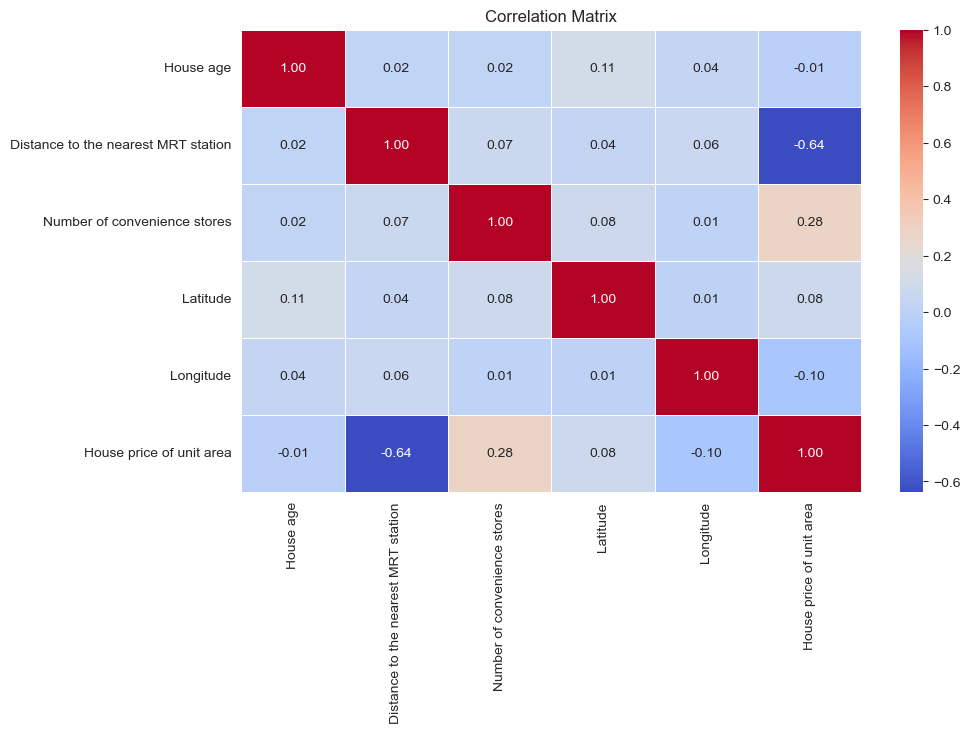

In [49]:
# Correlation matrix
correlation_matrix = real_estate_data.select_dtypes(include='number').corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
print(correlation_matrix)

In [55]:
# Building a regression model to predict the real estate prices using Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting Features and Target variable
features = ['Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude']
target = ['House price of unit area']

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42) # 20% for testing and rest 80% for training

# Model Initialization
model = LinearRegression()

# training the model
model.fit(X_train, y_train)

LinearRegression()

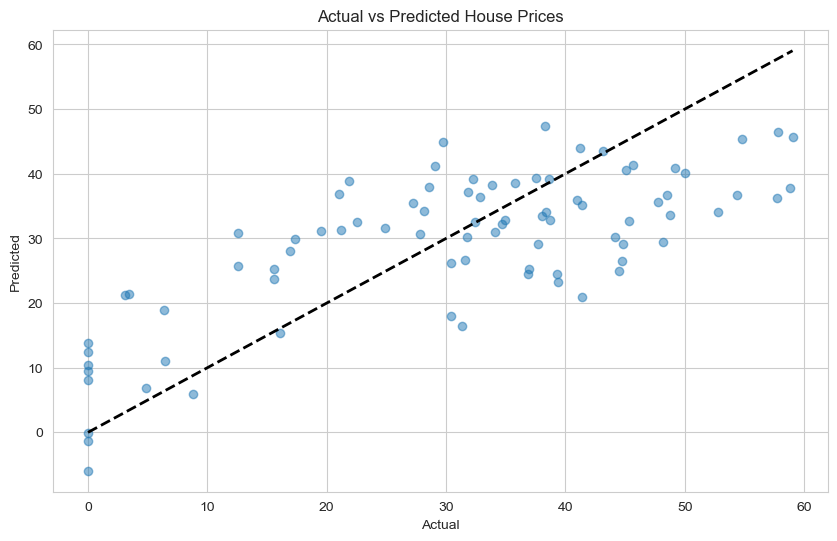

In [57]:
# Making predictions using linear regression model
y_pred_lr = model.predict(X_test)

# Visualization : Real vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 9.0 MB/s eta 0:00:0000:01:00:01


In [75]:
# Creating an end-to-end solution for our Machine Learning model by using the dash framework
import dash 
from dash import html, dcc, Input, Output, State
import pandas as pd

# Constants for conversion
NTD_TO_USD = 0.031       # 1 New Taiwan Dollar = 0.031 USD
PING_TO_SQM = 3.306      # 1 Ping = 3.306 square meters

# initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of your app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align':'center'}),
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to MRT Station (meters)', 
                      style={'margin':'10px','padding':'10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Convenience Stores', 
                     style={'margin':'10px', 'padding':'10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude', 
                      style={'margin':'10px', 'padding':'10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                     style={'margin':'10px', 'padding':'10px'}),
            dcc.Input(id='area_pings', type='number', placeholder='Area (in pings)', 
                     style={'margin':'10px', 'padding':'10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                       style={'margin':'10px','padding':'10px', 'background-color':'#007BFF', 'color':'white'}),
        ], style={'text-align':'center'}),
        html.Div(id='prediction_output', style={'text-align':'center','font-size':'20px','margin-top':'20px'})
    ], style={'width':'50%','margin':'0 auto','border': '2px solid #007BFF','padding': '20px','border-radius': '10px'})
])

# Define callback for update output
@app.callback(
    Output('prediction_output','children'),
    [Input('predict_button','n_clicks')],
    [State('distance_to_mrt','value'),
    State('num_convenience_stores','value'),
    State('latitude','value'),
    State('longitude','value'),
    State('area_pings','value')]
)

def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude, area_pings):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude, area_pings]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                               columns=['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude'])
        # Predict price per ping (in NTD)
        unit_price_ntd = model.predict(features).item()
        # Conversions
        unit_price_usd = unit_price_ntd * 0.031
        area_sqm = area_pings * 3.306
        total_price_usd = unit_price_usd * area_pings
        
        return html.Div([
            html.P(f"📏 Unit Price: {unit_price_ntd:.2f} NTD/ping (~${unit_price_usd:.2f} USD/ping)"),
            html.P(f"📐 Area: {area_pings:.2f} pings (~{area_sqm:.2f} m²)"),
            html.P(f"💰 Estimated Total House Price: ${total_price_usd:,.2f} USD")
        ])
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run(debug=True)